In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("../../dataset/winequality-red_decision_tree.csv")

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.columns = data.columns.str.replace(" ", "_")

In [11]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
data.quality = (data.quality >= 6).astype(int)

<Axes: xlabel='quality', ylabel='Count'>

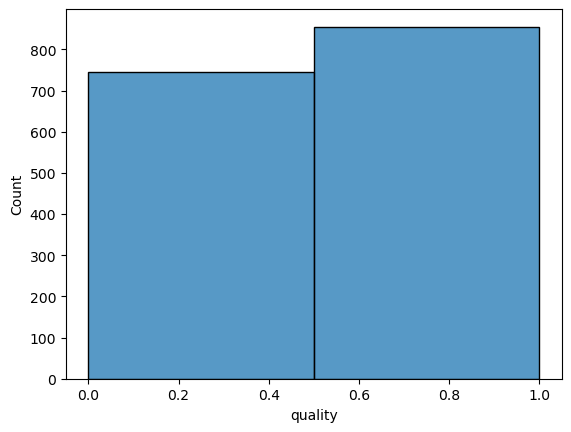

In [14]:
sns.histplot(data.quality, bins=2)

In [15]:
def rates(data):
    global_mean = round(data["quality"].mean(), 3)
    for col in data.columns:
        df_group = data.groupby(by=col).quality.agg(["mean"])
        df_group["diff"] = df_group["mean"] - global_mean
        df_group["rate"] = df_group["mean"] / global_mean
        display(df_group)
        
        
rates(data)

,mean,diff,rate
fixed_acidity,,,
4.6,0.000000,-0.535000,0.000000
4.7,1.000000,0.465000,1.869159
4.9,1.000000,0.465000,1.869159
5.0,0.666667,0.131667,1.246106
5.1,1.000000,0.465000,1.869159
...,...,...,...
14.3,1.000000,0.465000,1.869159
15.0,1.000000,0.465000,1.869159
15.5,0.000000,-0.535000,0.000000


,mean,diff,rate
volatile_acidity,,,
0.120,1.000000,0.465000,1.869159
0.160,1.000000,0.465000,1.869159
0.180,0.800000,0.265000,1.495327
0.190,0.500000,-0.035000,0.934579
0.200,0.666667,0.131667,1.246106
...,...,...,...
1.180,0.000000,-0.535000,0.000000
1.185,0.000000,-0.535000,0.000000
1.240,0.000000,-0.535000,0.000000


,mean,diff,rate
citric_acid,,,
0.00,0.469697,-0.065303,0.877938
0.01,0.636364,0.101364,1.189465
0.02,0.600000,0.065000,1.121495
0.03,0.333333,-0.201667,0.623053
0.04,0.344828,-0.190172,0.644538
...,...,...,...
0.75,1.000000,0.465000,1.869159
0.76,0.666667,0.131667,1.246106
0.78,1.000000,0.465000,1.869159


,mean,diff,rate
residual_sugar,,,
0.9,1.000000,0.465000,1.869159
1.2,0.750000,0.215000,1.401869
1.3,0.400000,-0.135000,0.747664
1.4,0.571429,0.036429,1.068091
1.5,0.433333,-0.101667,0.809969
...,...,...,...
13.4,1.000000,0.465000,1.869159
13.8,0.000000,-0.535000,0.000000
13.9,1.000000,0.465000,1.869159


,mean,diff,rate
chlorides,,,
0.012,1.00,0.465,1.869159
0.034,1.00,0.465,1.869159
0.038,1.00,0.465,1.869159
0.039,0.75,0.215,1.401869
0.041,0.75,0.215,1.401869
...,...,...,...
0.422,0.00,-0.535,0.000000
0.464,0.00,-0.535,0.000000
0.467,0.00,-0.535,0.000000


,mean,diff,rate
free_sulfur_dioxide,,,
1.0,1.000000,0.465000,1.869159
2.0,1.000000,0.465000,1.869159
3.0,0.591837,0.056837,1.106237
4.0,0.439024,-0.095976,0.820606
5.0,0.480769,-0.054231,0.898634
5.5,1.000000,0.465000,1.869159
6.0,0.681159,0.146159,1.273195
7.0,0.535211,0.000211,1.000395
8.0,0.571429,0.036429,1.068091


,mean,diff,rate
total_sulfur_dioxide,,,
6.0,0.333333,-0.201667,0.623053
7.0,0.500000,-0.035000,0.934579
8.0,0.642857,0.107857,1.201602
9.0,0.642857,0.107857,1.201602
10.0,0.851852,0.316852,1.592246
...,...,...,...
155.0,0.000000,-0.535000,0.000000
160.0,1.000000,0.465000,1.869159
165.0,1.000000,0.465000,1.869159


,mean,diff,rate
density,,,
0.99007,1.0,0.465,1.869159
0.99020,1.0,0.465,1.869159
0.99064,1.0,0.465,1.869159
0.99080,1.0,0.465,1.869159
0.99084,1.0,0.465,1.869159
...,...,...,...
1.00260,0.5,-0.035,0.934579
1.00289,0.0,-0.535,0.000000
1.00315,0.0,-0.535,0.000000


,mean,diff,rate
pH,,,
2.74,0.0,-0.535,0.000000
2.86,1.0,0.465,1.869159
2.87,1.0,0.465,1.869159
2.88,0.5,-0.035,0.934579
2.89,0.5,-0.035,0.934579
...,...,...,...
3.75,0.0,-0.535,0.000000
3.78,1.0,0.465,1.869159
3.85,1.0,0.465,1.869159


,mean,diff,rate
sulphates,,,
0.33,0.000000,-0.535000,0.000000
0.37,0.000000,-0.535000,0.000000
0.39,0.333333,-0.201667,0.623053
0.40,0.500000,-0.035000,0.934579
0.42,0.200000,-0.335000,0.373832
...,...,...,...
1.61,1.000000,0.465000,1.869159
1.62,0.000000,-0.535000,0.000000
1.95,1.000000,0.465000,1.869159


,mean,diff,rate
alcohol,,,
8.400000,0.500000,-0.035000,0.934579
8.500000,0.000000,-0.535000,0.000000
8.700000,1.000000,0.465000,1.869159
8.800000,0.000000,-0.535000,0.000000
9.000000,0.533333,-0.001667,0.996885
...,...,...,...
13.500000,1.000000,0.465000,1.869159
13.566667,1.000000,0.465000,1.869159
13.600000,1.000000,0.465000,1.869159


,mean,diff,rate
quality,,,
0,0.0,-0.535,0.000000
1,1.0,0.465,1.869159


In [16]:
X = data.drop("quality", axis=1)
y = data.quality

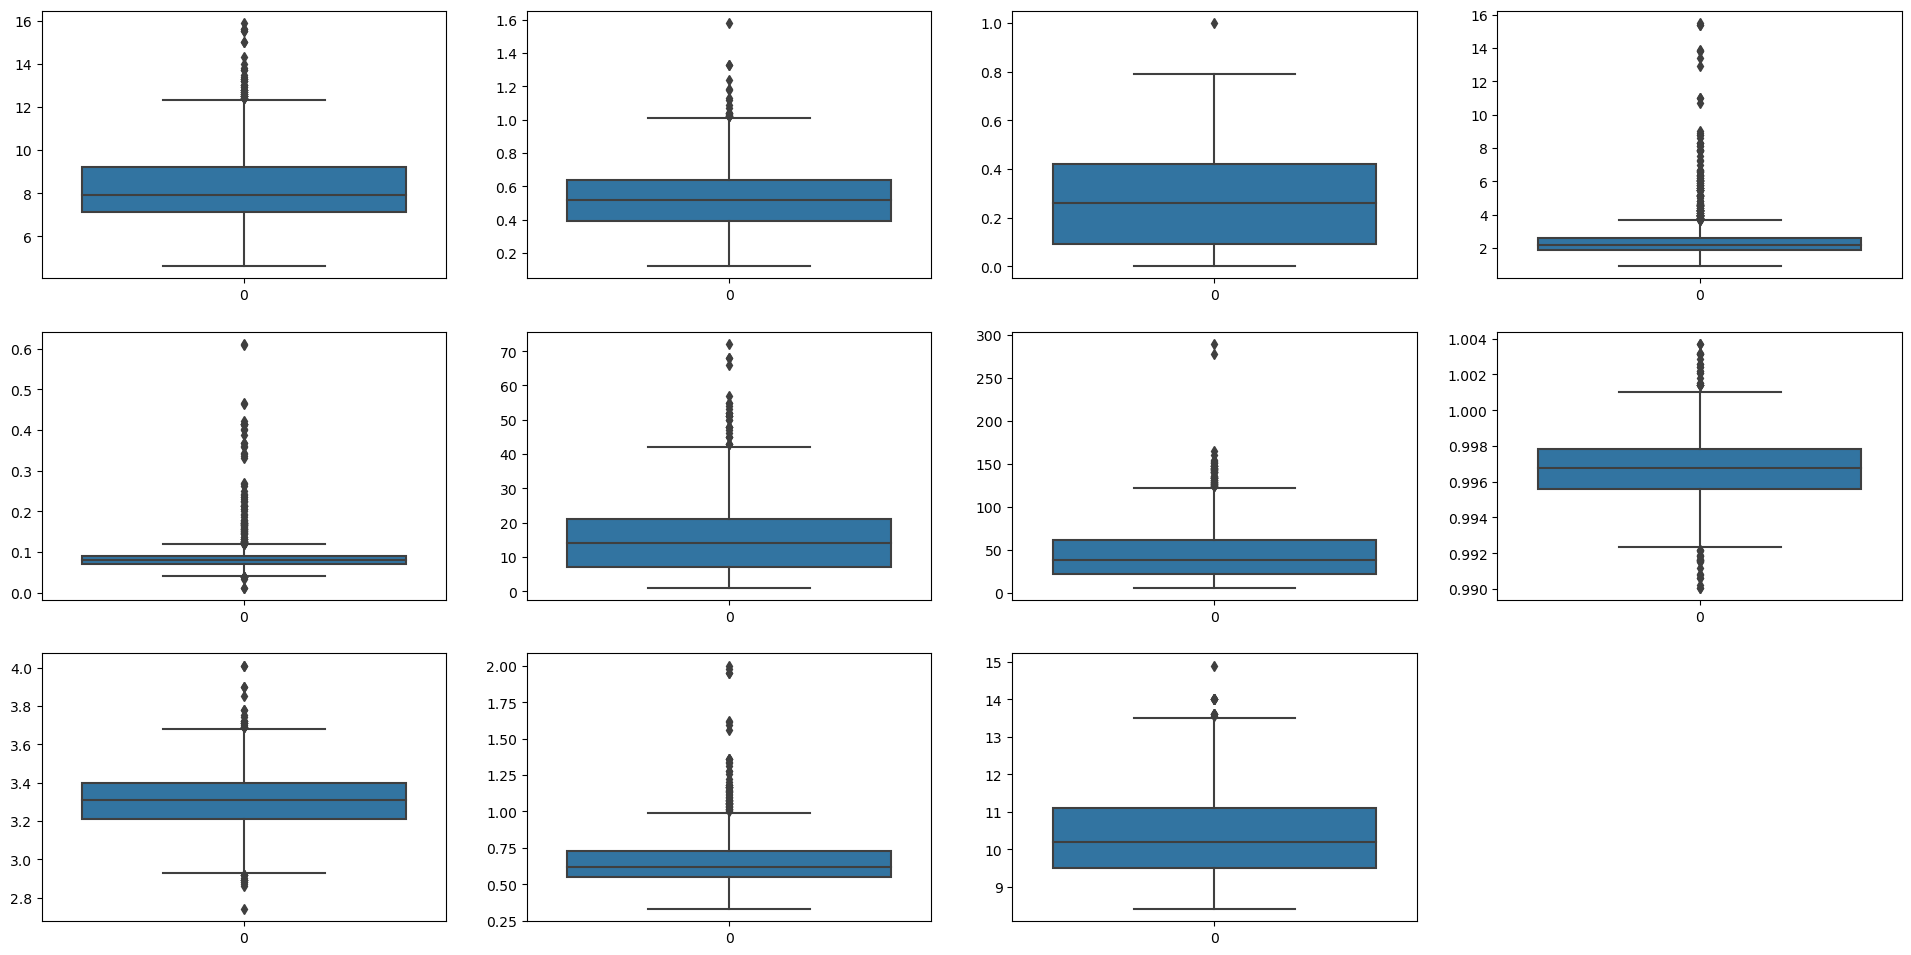

In [17]:
idx = 0
plt.figure(figsize=(24, 16))
for i in X.columns:
    idx += 1
    plt.subplot(4, 4, idx)
    sns.boxplot(X[i])

In [18]:
for i in X.columns:
    X[i] = X[i].clip(lower=X[i].quantile(0.05), upper=X[i].quantile(0.95))
    
X["residual_sugar"] = X["residual_sugar"].clip(lower=X["residual_sugar"].quantile(0.05), upper=X["residual_sugar"].quantile(0.90))
X["chlorides"] = X["chlorides"].clip(lower=X["chlorides"].quantile(0.05), upper=X["chlorides"].quantile(0.90))


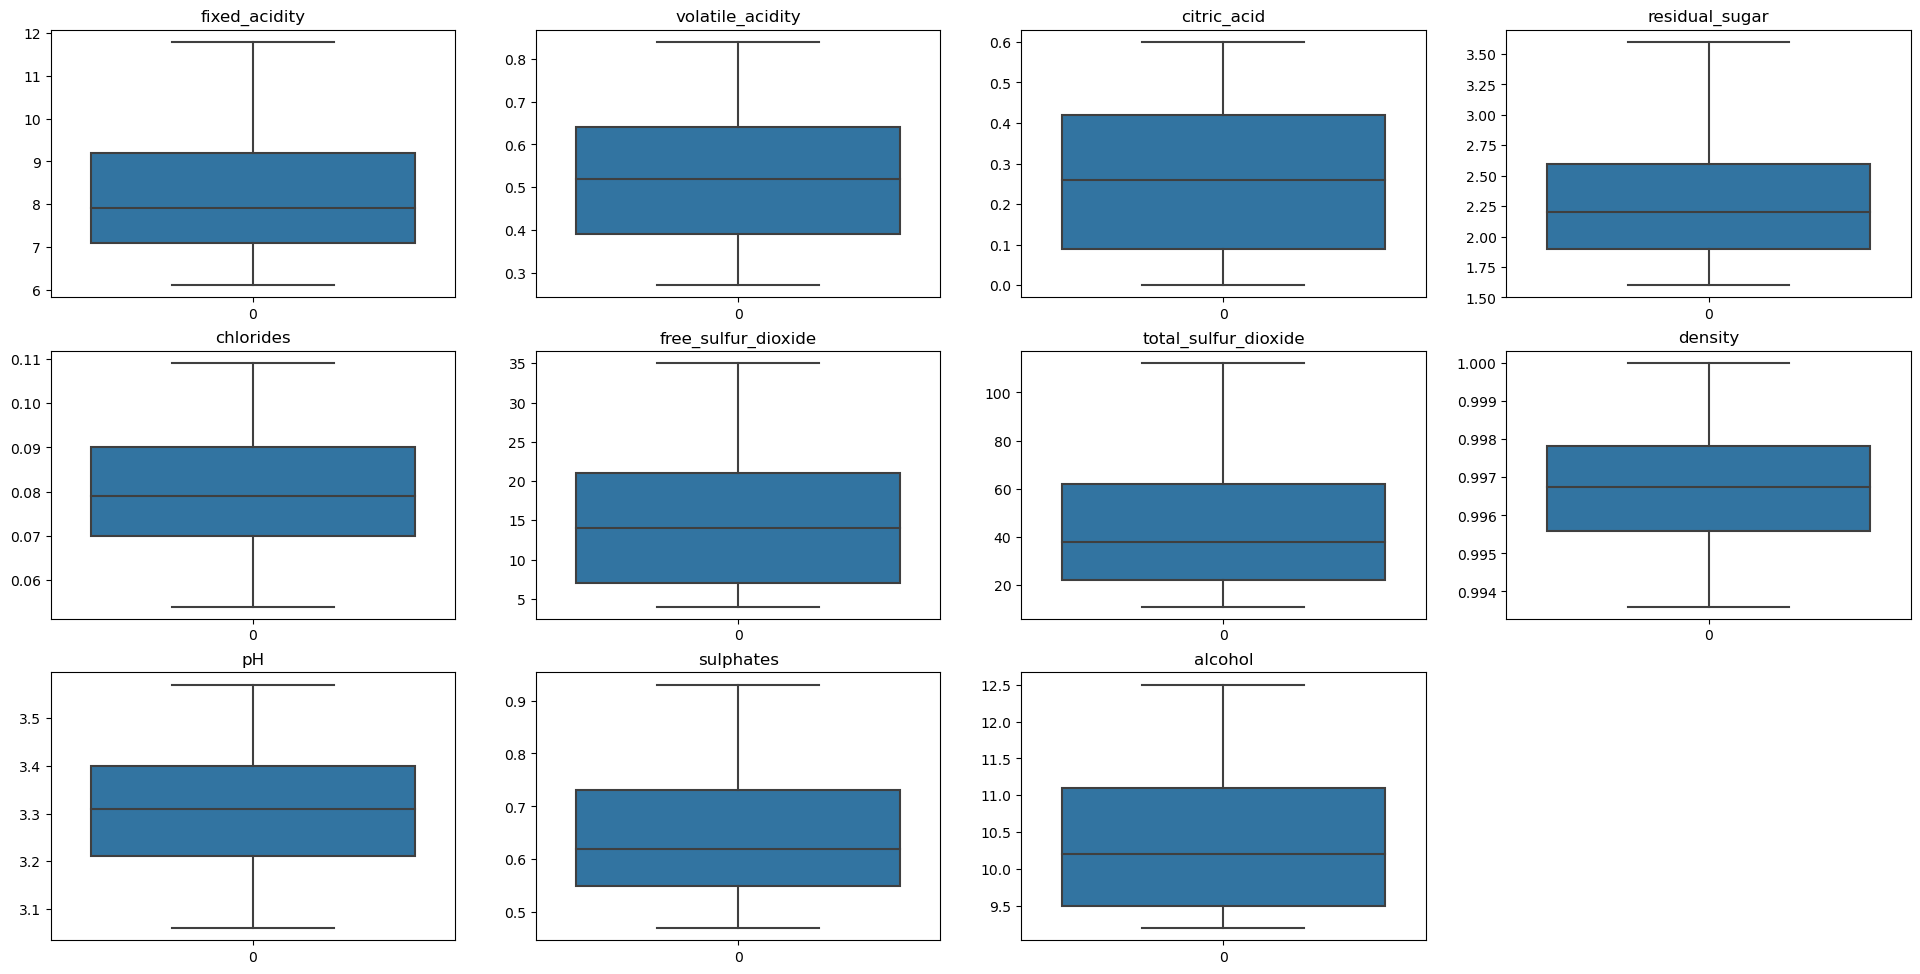

In [19]:
idx = 0
plt.figure(figsize=(24, 16))
for i in X.columns:
    idx += 1
    plt.subplot(4, 4, idx)
    plt.title(i)
    sns.boxplot(X[i])

In [20]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [21]:
corr = X.corrwith(y).sort_values(ascending=False).to_frame(name="Correlation")

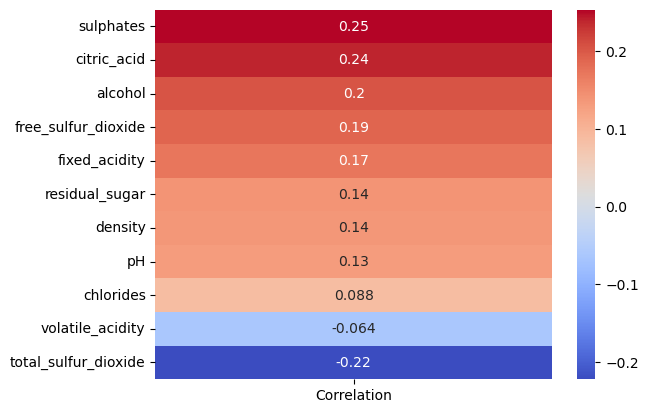

In [22]:
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [23]:
# X = X.drop(["chlorides", "volatile_acidity"], axis=1)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=23)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(oob_score=True)
model.fit(x_train, y_train)

RandomForestClassifier(oob_score=True)

In [26]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

parameters = {"n_estimators": range(100, 300, 100), 
              "min_samples_split": [2, 5, 10], 
              "min_samples_leaf": [1, 2, 4], 
              "max_depth":[None, 5, 10]}

grid_search = GridSearchCV(RandomForestClassifier(oob_score=True), parameters, cv=5, scoring="roc_auc")
grid_search.fit(x_valid, y_valid)

GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': range(100, 300, 100)},
             scoring='roc_auc')

In [27]:
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
model.set_params(max_depth=best_params["max_depth"], 
                 min_samples_leaf=best_params["min_samples_leaf"], 
                 min_samples_split=best_params["min_samples_split"],
                 n_estimators=best_params["n_estimators"], 
                 oob_score=True)

prediction = model.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, prediction))
print("AUC-ROC: ", roc_auc_score(y_test, prediction))
print("F1 Score: ", f1_score(y_test, prediction))

Accuracy:  0.765625
AUC-ROC:  0.7607857030388915
F1 Score:  0.7910863509749304


In [29]:
import pickle
with open("wineQuality.bin", "wb") as file:
    pickle.dump(model, file)